# K means (K moyennes)

In [24]:
#Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

In [25]:
# Chargement de base de donnees iris
iris = datasets.load_iris()

In [26]:
#affichage des donnees du dataset
print(iris.feature_names)  

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
#Stocker lesdonnees en tant que DataFrame Pandas.
x=pd.DataFrame(iris.data)
x.columns=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width']
y=pd.DataFrame(iris.target)
y.columns=['classe']

In [28]:
y

,classe
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


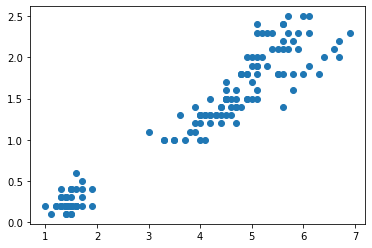

In [29]:
#Repartition du Dataset dans un scatter plot 2D
plt.scatter(x.Petal_length, x.Petal_width)

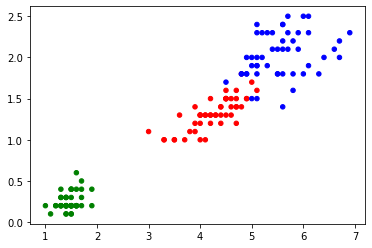

In [30]:
#Visualiser les classes de notre datset
colorL=np.array(['green','red','blue'])
plt.scatter(x.Petal_length, x.Petal_width,c=colorL[iris.target], s=20)

In [31]:
# Utiliser la methode elbow pour trouver le nombre optimal de clusters
inert = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i)
    kmeans.fit(x)
    inert.append(kmeans.inertia_)

C:\Users\Fallou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fallou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Fallou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fallou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

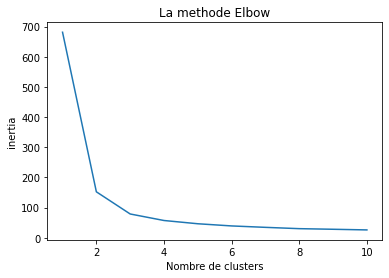

In [32]:
# Afficher la courbe de la methode Elbow
plt.plot(range(1, 11), inert)
plt.title('La methode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertia')
plt.show()

In [33]:
# Cluster K-means
model=KMeans(n_clusters=3)
model.fit(x)

C:\Users\Fallou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Fallou\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [34]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

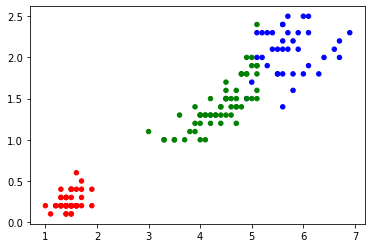

In [35]:
#Visualiser les classes predites par le modele
colorL=np.array(['green','red','blue'])
plt.scatter(x.Petal_length, x.Petal_width,c=colorL[model.labels_],s=20)

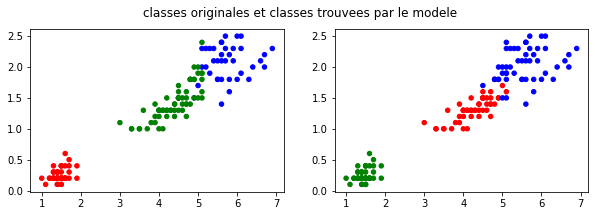

In [36]:
#Visaliser les classes originales et predites par le modele
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
fig.suptitle('classes originales et classes trouvees par le modele')
ax1.scatter(x.Petal_length, x.Petal_width,c=colorL[model.labels_],s=20)
ax2.scatter(x.Petal_length, x.Petal_width,c=colorL[iris.target],s=20)

In [37]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)